Pierre Navaro - [Institut de Recherche Mathématique de Rennes](https://irmar.univ-rennes1.fr) - [CNRS](http://www.cnrs.fr/)

# References

- [Pandas website](http://pandas.pydata.org).
- *Python for Data Analysis* by Wes McKinney ([O'Reilly Media](http://shop.oreilly.com/product/0636920023784.do)).
- [Analyzing and Manipulating Data with Pandas Beginner](https://youtu.be/6ohWS7J1hVA) | SciPy 2016 Tutorial | Jonathan Rocher.


![pandas](http://pandas.pydata.org/_static/pandas_logo.png "Pandas Logo")


- Started by Wes MacKinney with a first release in 2011.
- Based on NumPy, it is the most used library for all things data.
- Motivated by the toolbox in R for manipulating data easily.
- A lot of names in Pandas come from R world.
- It is Open source (BSD)

# Pandas 

```python
import pandas as pd
```

"*Pandas provides high-performance, easy-to-use data structures 
and data analysis tools in Python*"

- Self-describing data structures
- Data loaders to/from common file formats
- Plotting functions
- Basic statistical tools.


In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 8)
plt.rcParams['figure.figsize'] = (9, 6)

# Object Creation: Series


In [2]:
pd.Series([1,3,5,np.nan,6,8])

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

# Object Creation: DataFrame


In [3]:
dates = pd.date_range('20130101', periods=6)
pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

,A,B,C,D
2013-01-01,0.657166,-0.023061,-0.372365,-0.809371
2013-01-02,-1.306647,0.205899,-0.886222,-0.476147
2013-01-03,-0.191373,-1.349586,-1.246486,0.700303
2013-01-04,-0.970260,0.590848,1.443008,0.196065
2013-01-05,0.107324,-0.134256,-0.087932,-0.275650
2013-01-06,-0.131252,0.322436,-0.207516,-1.589192


In [4]:
pd.DataFrame({'A' : 1.,
              'B' : pd.Timestamp('20130102'),
              'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
              'D' : np.arange(4,dtype='int32'),
              'E' : pd.Categorical(["test","train","test","train"]),
              'F' : 'foo' })


,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,0,test,foo
1,1.0,2013-01-02,1.0,1,train,foo
2,1.0,2013-01-02,1.0,2,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


# Load data

http://pandas.pydata.org/pandas-docs/stable/io.html

We load data from [National Centers for Environmental Information](https://www.ncdc.noaa.gov/cag/time-series/global)

NOAA's National Centers for Environmental Information (NCEI) is responsible for preserving, monitoring, assessing, and providing public access to the Nation's treasure of climate and historical weather data and information.

This series is the mean of temperatures measured on the globe from 1901 to 2010.
https://www1.ncdc.noaa.gov/pub/data/anomalies/usingGHCNMv2/annual.land_ocean.90S.90N.df_1901-2000mean.dat

In [5]:
filename = "https://www1.ncdc.noaa.gov/pub/data/anomalies/usingGHCNMv2/annual.land_ocean.90S.90N.df_1901-2000mean.dat"
#pd.read_table?
full_globe_temp = pd.read_table(filename)
full_globe_temp


,1880 -0.1373
0,1881 -0.0600
1,1882 -0.1130
2,1883 -0.1505
3,1884 -0.2323
...,...
127,2008 0.4842
128,2009 0.5588
129,2010 0.6147
130,2011 -999.0000


### Values are separated by spaces

In [6]:
full_globe_temp = pd.read_table(filename, sep="\s+")
full_globe_temp

,1880,-0.1373
0,1881,-0.0600
1,1882,-0.1130
2,1883,-0.1505
3,1884,-0.2323
...,...,...
127,2008,0.4842
128,2009,0.5588
129,2010,0.6147
130,2011,-999.0000


### Change the column name

In [7]:
full_globe_temp = pd.read_table(filename, sep="\s+", names=["year", "mean temp"])
full_globe_temp

,year,mean temp
0,1880,-0.1373
1,1881,-0.0600
2,1882,-0.1130
3,1883,-0.1505
...,...,...
128,2008,0.4842
129,2009,0.5588
130,2010,0.6147
131,2011,-999.0000


### Set index to the year of the record

In [8]:
full_globe_temp = pd.read_table(filename, sep="\s+", 
                                names=["year", "mean temp"], 
                                index_col=0)
full_globe_temp

,mean temp
year,
1880,-0.1373
1881,-0.0600
1882,-0.1130
1883,-0.1505
...,...
2008,0.4842
2009,0.5588
2010,0.6147
2011,-999.0000


Index is the most important attribute of a Series or DataFrame because it is used into the structures to access the information.


In [9]:
full_globe_temp.index

Int64Index([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
            ...
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011],
           dtype='int64', name='year', length=132)

This table is a pandas DataFrame with only one column

In [10]:
type(full_globe_temp)

pandas.core.frame.DataFrame

Create a Series from this DataFrame

In [11]:
full_globe_temp = full_globe_temp["mean temp"]
print(type(full_globe_temp))
print(full_globe_temp.dtype)
print(full_globe_temp.shape)
print(full_globe_temp.nbytes)

<class 'pandas.core.series.Series'>
float64
(132,)
1056


### NumPy arrays as backend of Pandas

In [12]:
type(full_globe_temp.values)

numpy.ndarray

In the dataset, -999.00 was used to indicate that there was no value for that year.

In [13]:
full_globe_temp[full_globe_temp.values == -999.00]


year
2011   -999.0
Name: mean temp, dtype: float64

### Setting missing values

Replace them with the missing value that Pandas understand: np.nan

In [14]:
full_globe_temp[full_globe_temp == -999.000] = np.nan
full_globe_temp.tail()

year
2007    0.5510
2008    0.4842
2009    0.5588
2010    0.6147
2011       NaN
Name: mean temp, dtype: float64

### Removing missing values

Once they have been converted to np.nan, missing values can be removed (dropped).

In [15]:
full_globe_temp.dropna().tail() # NaN value is removed

year
2006    0.5623
2007    0.5510
2008    0.4842
2009    0.5588
2010    0.6147
Name: mean temp, dtype: float64

### Visualization

`.plot` generates a basic visualization using matplotlib.


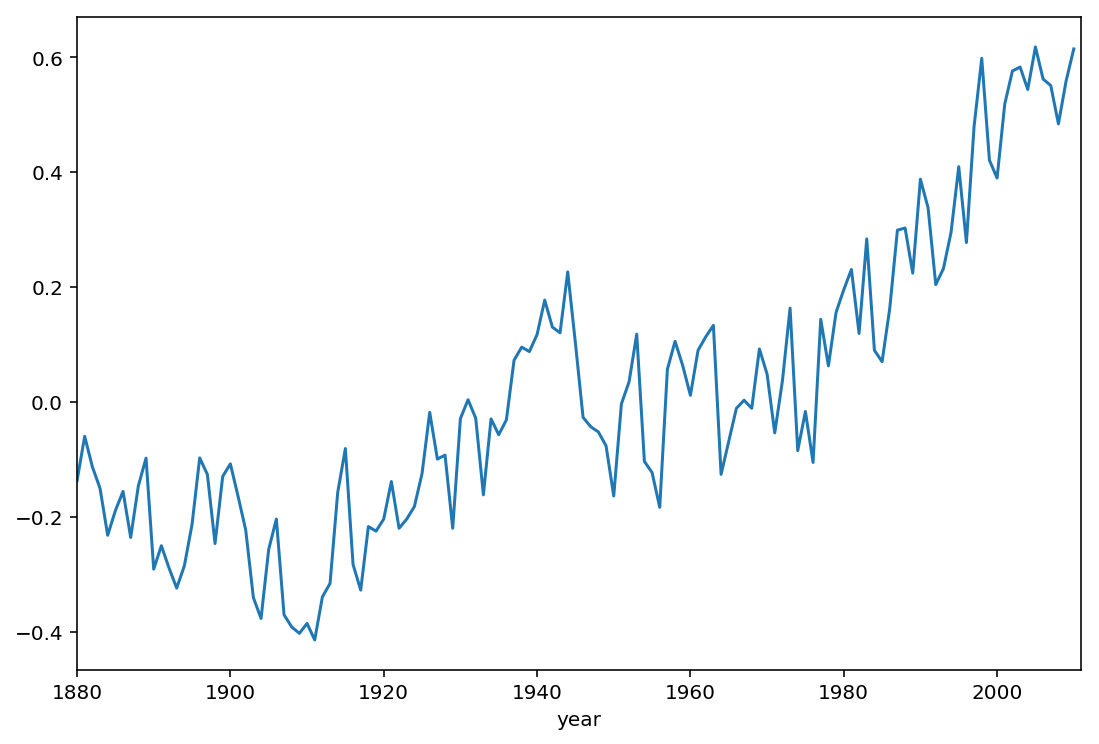

In [16]:
full_globe_temp.plot();

## Seaborn

[seaborn.regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) plots data and a linear regression model fit  (plot was easier if we kept the DataFrame format).

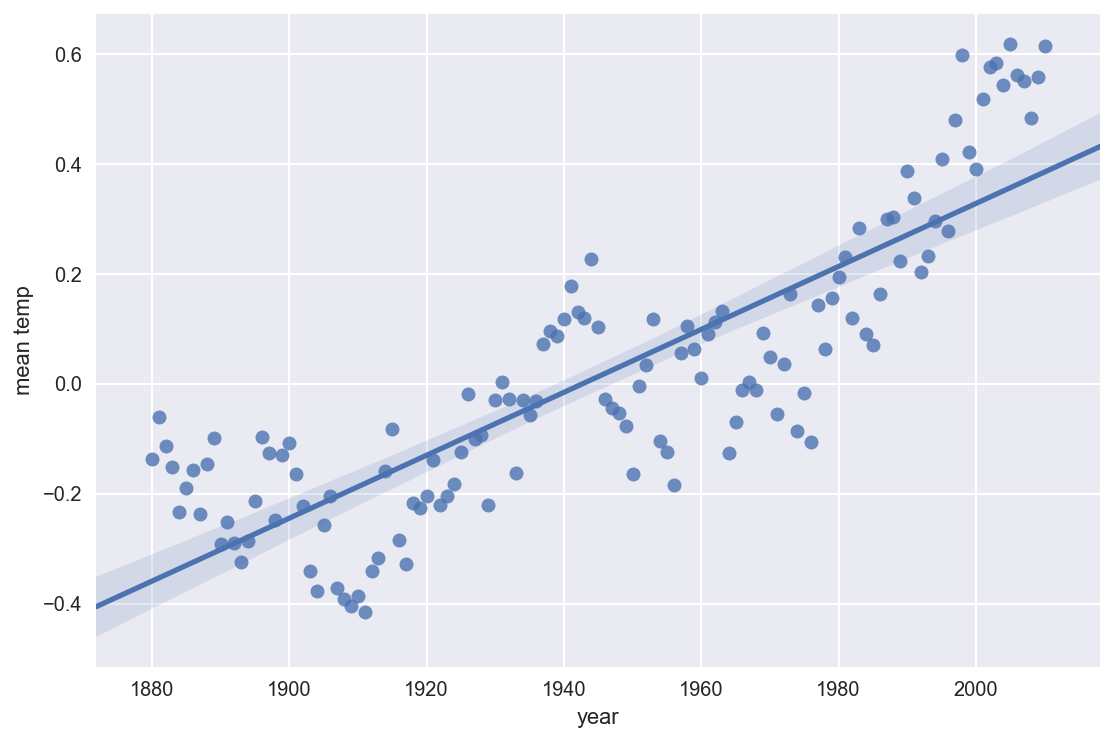

In [17]:
import seaborn as sns
sns.set()

sns.regplot(x=full_globe_temp.index.to_series(),
            y=full_globe_temp);


In [18]:
url = "https://www.fun-mooc.fr/c4x/agrocampusouest/40001S03/asset/AnaDo_JeuDonnees_TemperatFrance.csv"
df = pd.read_csv(url, delimiter=";", encoding="latin1", index_col=0)
df

,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,11.13,13.1,NO
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO
Vichy,2.4,3.4,7.1,9.9,13.6,17.1,19.3,18.8,16.0,11.0,6.6,3.4,46.08,3.26,10.72,16.9,SE


# Viewing Data

In [6]:
df.head()

,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.73,14.7,NE


In [7]:
df.tail()

,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
Paris,3.4,4.1,7.6,10.7,14.3,17.5,19.1,18.7,16.0,11.4,7.1,4.3,48.52,2.20,11.18,15.7,NE
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,11.13,13.1,NO
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO
Vichy,2.4,3.4,7.1,9.9,13.6,17.1,19.3,18.8,16.0,11.0,6.6,3.4,46.08,3.26,10.72,16.9,SE


In [8]:
df.index

Index(['Bordeaux', 'Brest', 'Clermont', 'Grenoble', 'Lille', 'Lyon',
       'Marseille', 'Montpellier', 'Nantes', 'Nice', 'Paris', 'Rennes',
       'Strasbourg', 'Toulouse', 'Vichy'],
      dtype='object')

We can ename an index by setting its name. For example, the index of the df dataFrame could be called "Ville":

In [9]:
df.index.name = "Ville"
df.head()

,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
Ville,,,,,,,,,,,,,,,,,
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.73,14.7,NE


In [10]:
import toyplot
canvas = toyplot.Canvas(width=640, height=480)
axes = canvas.cartesian(xlabel="Latitude", ylabel=u"Temperature \u00b0C")
for lati, moye, ville in zip(df['Lati'],df["Moye"],df.index):
    axes.text(lati, moye, ville, style={"-toyplot-anchor-shift":"10px","text-anchor":"start","font-size":"14px"})
    axes.scatterplot(lati,moye, color="black")


Bordeaux Brest Clermont Grenoble Lille Lyon Marseille Montpellier Nantes Nice Paris Rennes Strasbourg Toulouse Vichy 42 45 48 50 Latitude 9 11 13 15 Temperature °C

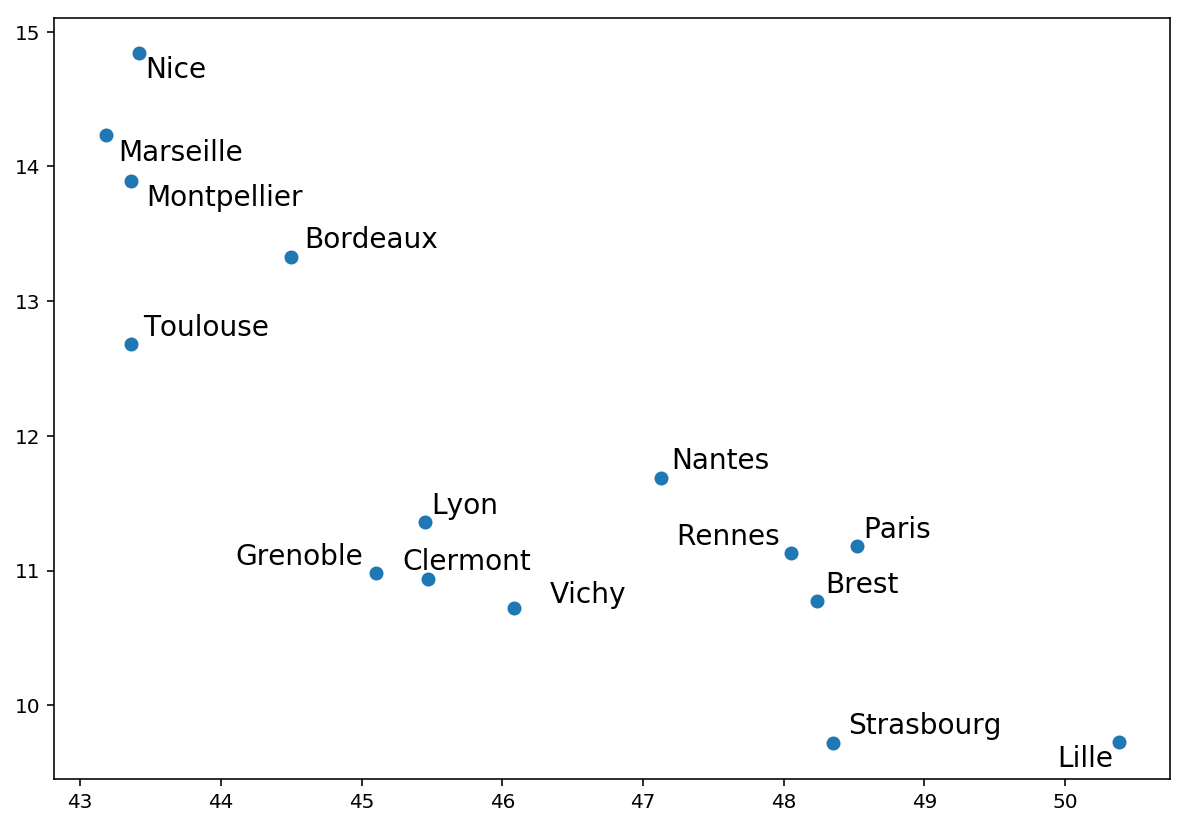

In [11]:
from adjustText import adjust_text

x, y = df['Lati'],df["Moye"]
labels = df.index
plt.scatter(x, y)
texts = []
for x0, y0, s0 in zip(x,y,labels):
    texts.append(plt.text(x0, y0, s0, size=14))
adjust_text(texts, x, y);

In [45]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [63]:
%%R
library(missMDA)
data(orange)
write.csv(orange,"orange.csv")
summary(orange)

 Color.intensity Odor.intensity  Attack.intensity     Sweet      
 Min.   :4.083   Min.   :4.292   Min.   :3.917    Min.   :4.083  
 1st Qu.:4.448   1st Qu.:4.958   1st Qu.:4.833    1st Qu.:4.510  
 Median :4.646   Median :5.292   Median :5.292    Median :4.938  
 Mean   :5.083   Mean   :5.326   Mean   :5.319    Mean   :4.943  
 3rd Qu.:5.948   3rd Qu.:5.938   3rd Qu.:5.375    3rd Qu.:5.479  
 Max.   :6.583   Max.   :6.167   Max.   :7.417    Max.   :5.792  
 NA's   :2       NA's   :1       NA's   :3        NA's   :4      
      Acid           Bitter           Pulp          Typicity    
 Min.   :4.125   Min.   :2.833   Min.   :1.292   Min.   :3.417  
 1st Qu.:4.375   1st Qu.:3.104   1st Qu.:1.510   1st Qu.:3.958  
 Median :5.042   Median :3.583   Median :2.479   Median :4.438  
 Mean   :5.065   Mean   :3.536   Mean   :3.312   Mean   :4.462  
 3rd Qu.:5.292   3rd Qu.:3.792   3rd Qu.:4.521   3rd Qu.:5.042  
 Max.   :6.750   Max.   :4.375   Max.   :7.333   Max.   :5.250  
 NA's   :3       

In [68]:
import pandas
orange = pandas.read_csv("orange.csv", index_col=0)
orange.describe()
orange.fillna(method="bfill")
orange

,Color.intensity,Odor.intensity,Attack.intensity,Sweet,Acid,Bitter,Pulp,Typicity
1,4.791667,5.291667,NaN,NaN,NaN,2.833333,NaN,5.208333
2,4.583333,6.041667,4.416667,5.458333,4.125000,3.541667,4.625000,4.458333
3,4.708333,5.333333,NaN,NaN,4.291667,3.166667,6.250000,5.166667
4,6.583333,6.000000,7.416667,4.166667,6.750000,NaN,1.416667,3.416667
5,NaN,6.166667,5.333333,4.083333,NaN,4.375000,3.416667,4.416667
6,6.333333,5.000000,5.375000,5.000000,5.500000,3.625000,4.208333,4.875000
7,4.291667,4.916667,5.291667,5.541667,5.250000,NaN,1.291667,4.333333
8,NaN,4.541667,4.833333,NaN,4.958333,2.916667,1.541667,3.958333
9,4.416667,NaN,5.166667,4.625000,5.041667,3.666667,1.541667,3.958333
10,4.541667,4.291667,NaN,5.791667,4.375000,NaN,NaN,5.000000


## Transferring R data sets into Python

In [48]:
from rpy2.robjects import r, pandas2ri

pandas2ri.activate()
r.library('missMDA')
r.data('orange')
r('orange')

,Color.intensity,Odor.intensity,Attack.intensity,Sweet,Acid,Bitter,Pulp,Typicity
1,4.791667,5.291667,NaN,NaN,NaN,2.833333,NaN,5.208333
2,4.583333,6.041667,4.416667,5.458333,4.125000,3.541667,4.625000,4.458333
3,4.708333,5.333333,NaN,NaN,4.291667,3.166667,6.250000,5.166667
4,6.583333,6.000000,7.416667,4.166667,6.750000,NaN,1.416667,3.416667
5,NaN,6.166667,5.333333,4.083333,NaN,4.375000,3.416667,4.416667
6,6.333333,5.000000,5.375000,5.000000,5.500000,3.625000,4.208333,4.875000
7,4.291667,4.916667,5.291667,5.541667,5.250000,NaN,1.291667,4.333333
8,NaN,4.541667,4.833333,NaN,4.958333,2.916667,1.541667,3.958333
9,4.416667,NaN,5.166667,4.625000,5.041667,3.666667,1.541667,3.958333
10,4.541667,4.291667,NaN,5.791667,4.375000,NaN,NaN,5.000000


# From a local or remote HTML file
To be able to grab more local data about mean sea levels, we can download and extract data about mean sea level stations around the world from the PSMSL (http://www.psmsl.org/). Again to download and parse all tables in a webpage, just give `read_html` the URL to parse:

In [49]:
# Needs `lxml`, `beautifulSoup4` and `html5lib` python packages
# Local backup in data/sea_levels/Obtaining Tide Gauge Data.html
table_list = pd.read_html("http://www.psmsl.org/data/obtaining/")

In [50]:
# there is 1 table on that page which contains metadata about the stations where 
# sea levels are recorded
local_sea_level_stations = table_list[0]
local_sea_level_stations

,Station Name,ID,Lat.,Lon.,GLOSS ID,Country,Date,Coastline,Station
0,HELIGMAN,231,60.200,19.300,NaN,ALA,01/01/1980,60,251
1,KOBBAKLINTAR,63,60.033,19.883,NaN,ALA,01/01/1980,60,261
2,LEMSTROM,84,60.100,20.017,NaN,ALA,01/01/1980,60,271
3,FOGLO / DEGERBY,249,60.032,20.385,NaN,ALA,24/01/2017,60,281
4,PAGO PAGO,539,-14.280,-170.690,144.0,ASM,02/02/2017,745,1
5,BAHIA ESPERANZA,988,-63.300,-56.917,185.0,ATA,11/05/1999,999,1
6,ARGENTINE ISLANDS,913,-65.246,-64.257,188.0,ATA,21/05/2015,999,3
7,PUERTO SOBERANIA,1603,-62.483,-59.633,189.0,ATA,30/09/2004,999,5
...,...,...,...,...,...,...,...,...,...
1498,DANANG,1475,16.100,108.217,NaN,VNM,17/11/2015,605,51
